In [289]:
import pickle

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [290]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [291]:
with open(f'for_post3.pickle', mode='rb') as fp:
    ptv_result = pickle.load(fp)

In [292]:
ptv_result = ptv_result.sort_values(by='y', ascending=True).values

In [293]:
Grid_X, Grid_Y = 200, 120

In [294]:
width, height = 1024, 600

In [295]:
x = np.linspace(0, 1024, Grid_X)
y = np.linspace(0, 600, Grid_Y)
xx, yy = np.meshgrid(x, y)

u = np.zeros([Grid_Y, Grid_X])
v = np.zeros([Grid_Y, Grid_X])

In [296]:
sigma = 1.24 * np.sqrt(height * width / ptv_result.shape[0])

In [297]:
for j in tqdm(range(0, Grid_Y)):
    upper_limit = ptv_result[np.where(ptv_result[:, 1] >= height // Grid_Y * j)]
    upper_bottom_limit = upper_limit[np.where(upper_limit[:, 1] < height // Grid_Y * (j + 1))]

    tmp_y = pd.DataFrame(data=upper_bottom_limit[:, :4], columns=['x', 'y', 'dx', 'dy']).sort_values(by='x', ascending=True).values

    for i in range(0, Grid_X):
        left_limit = tmp_y[np.where(tmp_y[:, 0] >= width // Grid_X * i)]
        left_right_limit = left_limit[np.where(left_limit[:, 0] < width // Grid_X * (i + 1))]
        tmp = left_right_limit

        top_u, top_v = 0, 0
        bottom = 0
        omega = 0

        for k in range(tmp.shape[0]):
            r = np.sqrt((width // Grid_X * (i + 0.5) - tmp[k][0])**2 + (height // Grid_Y * (j + 0.5) - tmp[k][1])**2)
            omega = np.exp(- (r / sigma)**2)

            top_u += omega * tmp[k][2]
            top_v += omega * tmp[k][3]
            bottom += omega

        if omega == 0:
            u[j, i] = np.nan
            v[j, i] = np.nan
        else:
            u[j, i] = top_u / bottom
            v[j, i] = top_v / bottom

100%|██████████| 120/120 [00:04<00:00, 24.76it/s]


In [298]:
px2m = 1000 / np.sqrt((498 - 488)**2 + (391 - 646)**2)/1e3
fps = 25

In [299]:
for j in range(xx.shape[0]):
    for i in range(xx.shape[1]):
        if np.sqrt((xx[j, i] - 520)**2 + (51 - yy[j, i])**2)*px2m < 0.4:
            u[j, i] = np.nan
            v[j, i] = np.nan

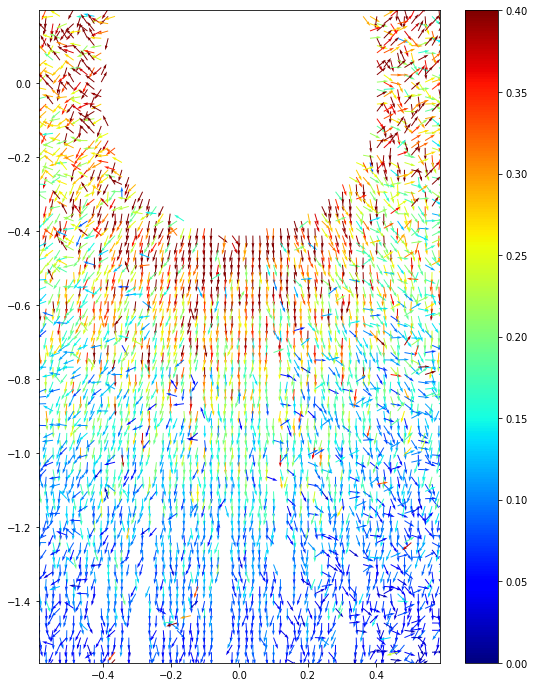

In [300]:
fig, ax = plt.subplots(figsize=(9, 12))
plt.xlim(-150*px2m, 150*px2m)
plt.ylim(-400*px2m, 50*px2m)

plt.quiver((xx - 520)*px2m, (51 - yy)*px2m, u/np.sqrt(u**2 + v**2), -v/np.sqrt(u**2 + v**2), np.sqrt(u**2 + v**2)*px2m*fps, scale_units='xy', scale=30, cmap="jet")

plt.colorbar()
plt.clim(0, 0.4)
plt.show()

# fig.savefig('q_20.png')

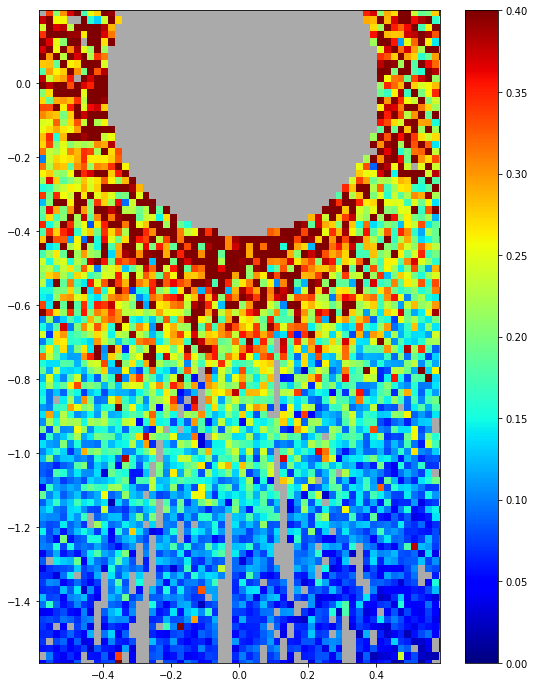

In [301]:
fig, ax = plt.subplots(figsize=(9, 12))
ax.set_facecolor('#aaa')
plt.xlim(-150*px2m, 150*px2m)
plt.ylim(-400*px2m, 50*px2m)

plt.pcolormesh((xx - 520)*px2m, (51 - yy)*px2m, np.sqrt(u**2 + v**2)*px2m*fps, cmap="jet")

plt.colorbar()
plt.clim(0, 0.4)
plt.show()
fig.savefig('q_20.png')

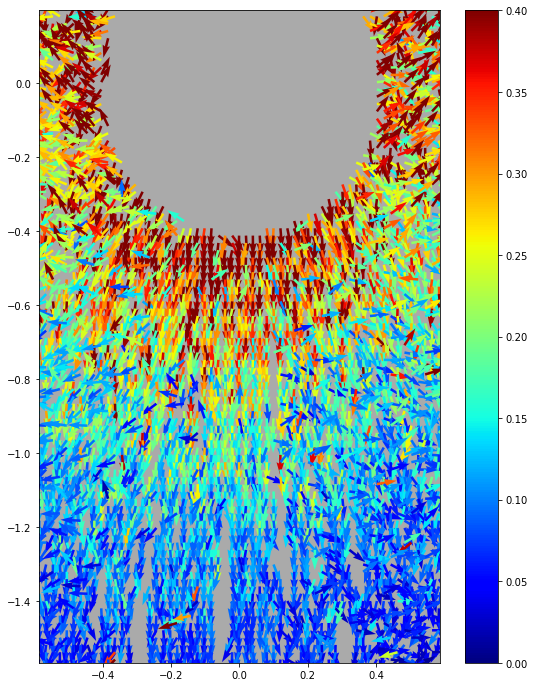

In [302]:
fig, ax = plt.subplots(figsize=(9, 12))
ax.set_facecolor('#aaa')

plt.xlim(-150*px2m, 150*px2m)
plt.ylim(-400*px2m, 50*px2m)

plt.quiver((xx - 520)*px2m, (51 - yy)*px2m, u/np.sqrt(u**2 + v**2), -v/np.sqrt(u**2 + v**2), np.sqrt(u**2 + v**2)*px2m*fps, cmap="jet", scale=18, units='xy', width=0.007)

plt.colorbar()
plt.clim(0, 0.4)
plt.show()
fig.savefig('q_20_2.png')